
# This notebook was done as to the first part of the fourth assignment of a machine learning class. This notebook contains codes to using Convolution Neural Network using Keras and Tensorflow. This dataset is the 28x28 grayscale images of digits 0-9. Application to reduce the "noise" of distorted images using a trained CNN.



# 4662 HW 4 Problem 1



# Part A


In [24]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, Conv2DTranspose
from keras.utils import np_utils

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import numpy as np



# Part B


In [25]:

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255



# Part C


In [26]:

def noise(array):
    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=array.shape)
    return np.clip(noisy_array, 0.0, 1.0)


In [27]:

noisy_X_train = noise(X_train)

noisy_X_test = noise(X_test)



# Part D


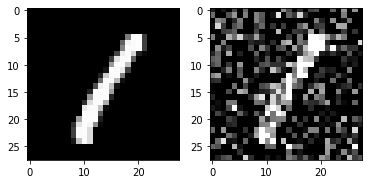

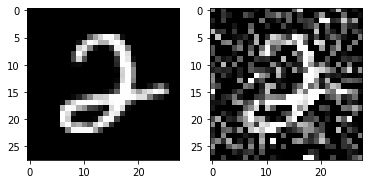

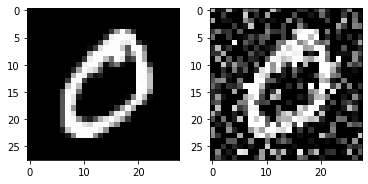

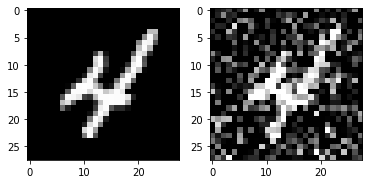

In [29]:

%matplotlib inline

# subplot (1, 2, 1) is the original image in each row
# subplots (1, 2, 2) is the distorted image in each row

plt.subplot(1 , 2, 1)
plt.imshow(X_train[3, :, :], cmap='gray')
plt.subplot(1 , 2, 2)
plt.imshow(noisy_X_train[3, :, :], cmap='gray')
plt.show()

plt.subplot(1 , 2, 1)
plt.imshow(X_train[16, :, :], cmap='gray')
plt.subplot(1 , 2, 2)
plt.imshow(noisy_X_train[16, :, :], cmap='gray')
plt.show()

plt.subplot(1 , 2, 1)
plt.imshow(X_train[1, :, :], cmap='gray')
plt.subplot(1 , 2, 2)
plt.imshow(noisy_X_train[1, :, :], cmap='gray')
plt.show()

plt.subplot(1 , 2, 1)
plt.imshow(X_train[9, :, :], cmap='gray')
plt.subplot(1 , 2, 2)
plt.imshow(noisy_X_train[9, :, :], cmap='gray')
plt.show()




# Part E


In [30]:

model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))

# Encoder:
model.add(Convolution2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Convolution2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))

# Decoder:
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Convolution2D(1, (3, 3), activation="sigmoid", padding="same"))





# Part F


In [31]:

model.compile(loss='binary_crossentropy', optimizer='adam')

print (model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 32)       


# Part G


In [32]:

cnn_history = model.fit(noisy_X_train, X_train, batch_size=128, epochs=5)




Epoch 1/5
469/469 [==============================] - 403s 856ms/step - loss: 0.2808
Epoch 2/5
469/469 [==============================] - 461s 984ms/step - loss: 0.1000
Epoch 3/5
469/469 [==============================] - 471s 1s/step - loss: 0.0944
Epoch 4/5
469/469 [==============================] - 483s 1s/step - loss: 0.0920
Epoch 5/5
469/469 [==============================] - 474s 1s/step - loss: 0.0904



# Part H


In [34]:

de_noised_X_test = model.predict(noisy_X_test)



# Part I


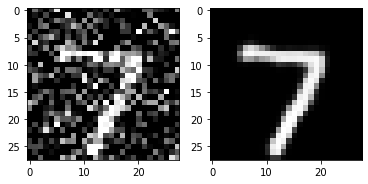

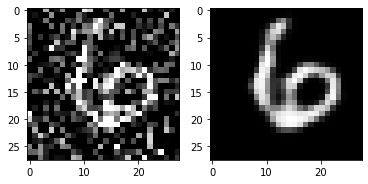

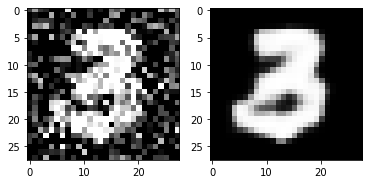

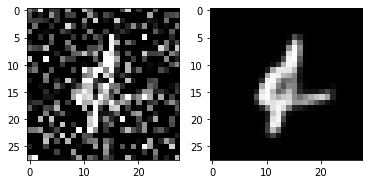

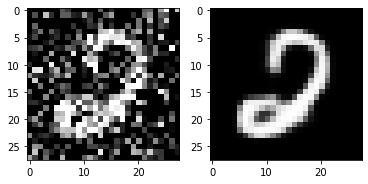

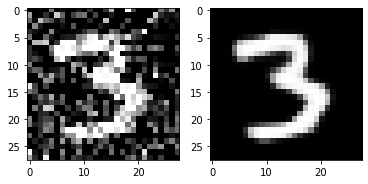

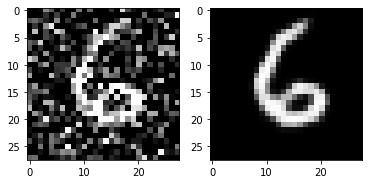

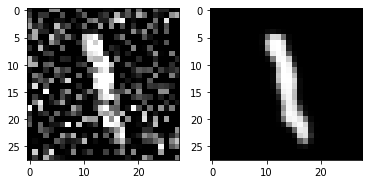

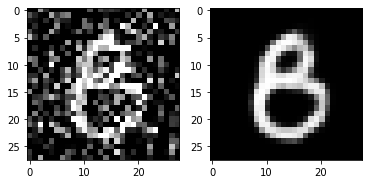

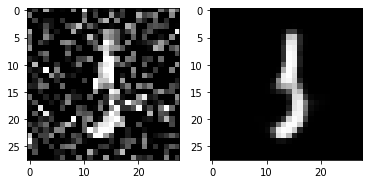

In [39]:

%matplotlib inline

# subplot (1, 2, 1) is the original distorted image in each row
# subplots (1, 2, 2) is the original reconstructed image in each row

# the indices of the both image sets are fixed for consistency
# though the actual images will depend on the train test split section

for i in range (0, 1000, 100):
    plt.subplot(1 , 2, 1)
    plt.imshow(noisy_X_test[i, :, :], cmap='gray')
    plt.subplot(1 , 2, 2)
    plt.imshow(de_noised_X_test[i, :, :], cmap='gray')
    plt.show()

